In [13]:
# Import packages
# Data analysis
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')

# Task Definition
1. Requirements Gathering
    Merge of sample data set tables. An analysis of their content categories that highlights the top 5 categories with the largest aggregate popularity. 
2. Data Cleaning
    Make sure data is clean and ready for analysis.
    1. Removing columns that have a high number of missing values
    2. Removing rows which are errorneous
    3. Changing the data type of some values within a column
    4. Removing columns which are not relevant to the task
3. Data Modelling.
    Merge a final dataset and export in csv format.
# Data Cleaning and Modeling

In [14]:
# Data import
df_content = pd.read_csv("Content (1).csv", index_col=0)
df_location = pd.read_csv("Location (1).csv", index_col=0)
df_profile = pd.read_csv("Profile (1).csv", index_col=0)
df_reactions = pd.read_csv("Reactions (1).csv", index_col=0)
df_reactiontypes = pd.read_csv("ReactionTypes (1).csv", index_col=0)
df_user = pd.read_csv("User (1).csv", index_col=0)
df_session = pd.read_csv("Session (1).csv", index_col=0)

In [15]:
# Inspect empty values in the tables
print("\nContent: \n", df_content.isnull().sum()[df_content.isnull().sum() != 0])
print("\nLocation: \n", df_location.isnull().sum()[df_location.isnull().sum() != 0])
print("\nProfile: \n", df_profile.isnull().sum()[df_profile.isnull().sum() != 0])
print("\nReactions: \n", df_reactions.isnull().sum()[df_reactions.isnull().sum() != 0])
print("\nReaction types: \n", df_reactiontypes.isnull().sum()[df_reactiontypes.isnull().sum() != 0])
print("\nUser: \n", df_user.isnull().sum()[df_user.isnull().sum() != 0])
print("\nSession: \n", df_session.isnull().sum()[df_session.isnull().sum() != 0])


Content: 
 URL    199
dtype: int64

Location: 
 Series([], dtype: int64)

Profile: 
 Series([], dtype: int64)

Reactions: 
 User ID    3019
Type        980
dtype: int64

Reaction types: 
 Series([], dtype: int64)

User: 
 Series([], dtype: int64)

Session: 
 Series([], dtype: int64)


Conclusion: 
- URL from content table should be deleted because it has too many empty values and is irrelevant to the task
- All entries in reaction table that does not have a User ID should be deleted because cannot merge to the final datamodel
- Other tables are free from empty value

In [16]:
# Remove empty columns
df_content.drop(columns="URL", inplace=True)

# Remove empty rows
df_reactions.dropna(inplace=True)

Data model to use:
- The requirement is to do an analysis of their content categories that highlights the top 5 categories with the largest aggregate popularity. Thus we need to use content, reaction, and reaction types to aggregate into the final results.
- Among the tables, URL is not needed.

In [17]:
# Clean the category column
df_content['Category'] = df_content['Category'].str.replace("\"","")
df_content['Category'] = df_content['Category'].str.lower()
df_content['Category'].value_counts()

technology         73
animals            72
travel             69
science            68
culture            67
fitness            66
food               64
soccer             64
healthy eating     62
cooking            61
tennis             59
education          59
studying           58
dogs               58
public speaking    50
veganism           50
Name: Category, dtype: int64

In [26]:
# Combining tables
df = df_reactions.merge(right = df_content, how = "left", on = "Content ID").drop(columns="User ID_y")
df.rename(columns={"User ID_x":"User ID", "Type_x":"Reaction Type", "Type_y":"Content Type"}, inplace=True)

df = df.merge(right = df_reactiontypes, how = "left", left_on = "Reaction Type", right_on = "Type")
df.head()

,Content ID,User ID,Reaction Type,Datetime,Content Type,Category,Type,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,photo,studying,disgust,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,photo,studying,dislike,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,photo,studying,scared,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,photo,studying,disgust,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58,photo,studying,interested,positive,30


In [19]:
# Checking if there is still empty values in the result dataframe
df.isnull().sum()

Content ID       0
User ID          0
Reaction Type    0
Datetime         0
Content Type     0
Category         0
Type             0
Sentiment        0
Score            0
dtype: int64

In [20]:
# Export dataframe
df.to_csv("result.csv")

# Data Analytics
## Top posted categories

In [47]:
df['Category'].value_counts()

animals            1738
science            1646
healthy eating     1572
technology         1557
food               1556
culture            1538
cooking            1525
travel             1510
soccer             1339
education          1311
fitness            1284
studying           1251
dogs               1227
tennis             1218
veganism           1146
public speaking    1116
Name: Category, dtype: int64

## Top posted time

In [66]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Month'] = df['Datetime'].dt.month
df['Month'].value_counts().sort_values(ascending=False)

5     1954
1     1949
8     1945
12    1941
10    1889
7     1884
11    1866
9     1862
3     1857
6     1836
4     1801
2     1750
Name: Month, dtype: int64

In [76]:
df['Year-Month'].value_counts().sort_values(ascending=False)

2021-05    1954
2021-01    1949
2020-08    1945
2020-12    1941
2020-10    1889
2020-07    1884
2020-11    1866
2020-09    1862
2021-03    1857
2021-04    1801
2021-02    1750
2021-06    1028
2020-06     808
Freq: M, Name: Year-Month, dtype: int64

<AxesSubplot:xlabel='Year-Month'>

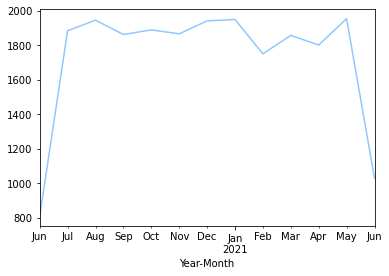

In [75]:
df['Year-Month'] = df['Datetime'].dt.to_period('M')
df.groupby(by='Year-Month')['Year-Month'].count().plot()

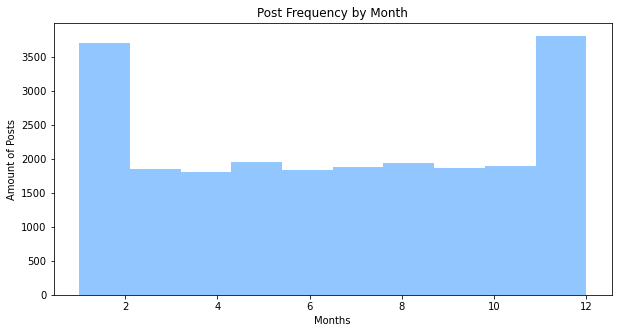

In [81]:
fig, ax = plt.subplots(figsize = (10,5))

ax.hist(df['Month'])

ax.set_xlabel("Months")
ax.set_ylabel("Amount of Posts")
ax.set_title("Post Frequency by Month")

plt.show()

## Top popular categories

In [45]:
# total number of categories
len(df['Category'].value_counts())

16

In [161]:
df['Category'].value_counts()

animals            1738
science            1646
healthy eating     1572
technology         1557
food               1556
culture            1538
cooking            1525
travel             1510
soccer             1339
education          1311
fitness            1284
studying           1251
dogs               1227
tennis             1218
veganism           1146
public speaking    1116
Name: Category, dtype: int64

In [98]:
category_ranking = df.groupby(by = "Category")['Score'].sum().sort_values(ascending=False)
category_ranking

Category
animals            68624
science            65405
healthy eating     63138
technology         63035
food               61598
culture            60663
travel             59358
cooking            59174
soccer             53216
education          52759
fitness            50835
studying           49442
dogs               48398
tennis             46185
veganism           45901
public speaking    45751
Name: Score, dtype: int64

Text(0.5, 1.0, 'Top 5 Most Popular Categories')

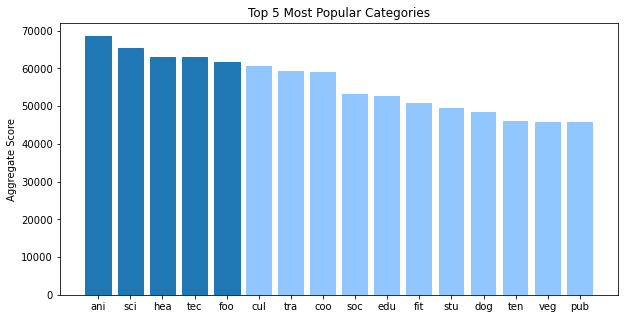

In [145]:
plt.figure(figsize = (10,5))

bars = plt.bar(category_ranking.index.str[:3],height=category_ranking)
bars[0].set_color("tab:blue")
bars[1].set_color("tab:blue")
bars[2].set_color("tab:blue")
bars[3].set_color("tab:blue")
bars[4].set_color("tab:blue")

plt.ylabel("Aggregate Score")
plt.title("Top 5 Most Popular Categories")

#bars.set_ylabel("Aggregate Score")
# plt.set_title("Top 5 Most Popular Categories")

# plt.show()

Text(0.5, 1.0, 'Science Category Top 5 Reactions')

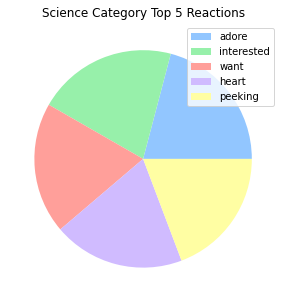

In [159]:
plt.figure(figsize = (10,5))

plt.pie(df[(df['Category'] == 'science') | (df['Category'] == 'technology')]['Type'].value_counts()[:5])

plt.legend(df[(df['Category'] == 'science') | (df['Category'] == 'technology')]['Type'].value_counts().index[:5])
plt.title("Science & Technology Category Top 5 Reactions")

Text(0.5, 1.0, 'Food & Healthy Eating Category Top 5 Reactions')

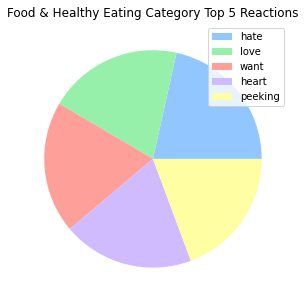

In [160]:
plt.figure(figsize = (10,5))

plt.pie(df[(df['Category'] == 'healthy eating') | (df['Category'] == 'food')]['Type'].value_counts()[:5])

plt.legend(df[(df['Category'] == 'healthy eating') | (df['Category'] == 'food')]['Type'].value_counts().index[:5])
plt.title("Food & Healthy Eating Category Top 5 Reactions")